In [1]:
import duckdb 
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns


%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb

In [4]:
%%sql
create or replace table df as 
select *
from read_csv_auto('../datasets/competencia_01_crudo.csv')

,Count
0,978439


In [4]:
import duckdb
sql = """
create or replace table df as 
select *
from read_csv_auto('../datasets/datasets_competencia_02_crudo.csv.gz')"""

conn=duckdb.connect('../datasets/base_de_datos.duckdb')

conn.execute(sql)
conn.close()

In [7]:
sql="""
        select foto_mes , 
        COUNT(*) FILTER(where clase_ternaria = 'BAJA+1') as "BAJA+1",
        COUNT(*) FILTER(where clase_ternaria = 'BAJA+2') as "BAJA+2",
        COUNT(*) FILTER(where clase_ternaria = 'Continua') as "Continua"
        from df
        group by foto_mes"""
    # Ejecucion de la consulta SQL
conn = duckdb.connect("../datasets/base_de_datos.duckdb")
contador=conn.execute(sql).pl()
conn.close()
contador

foto_mes,BAJA+1,BAJA+2,Continua
i64,i64,i64,i64
201901,635,720,122918
201902,723,693,123985
201903,694,738,124535
201904,743,502,125293
201905,505,681,126016
…,…,…,…
202104,952,1126,161340
202105,1129,842,161946
202106,842,1135,162336


In [9]:
sql="""
        select foto_mes, mrentabilidad_lag_1 ,mrentabilidad_lag_2 ,mrentabilidad_lag_3  from df LIMIT 5 """
    # Ejecucion de la consulta SQL
conn = duckdb.connect("../datasets/base_de_datos.duckdb")
df=conn.execute(sql).pl()
conn.close()
df

foto_mes,mrentabilidad_lag_1,mrentabilidad_lag_2,mrentabilidad_lag_3
i64,f64,f64,f64
201901,null,null,null
201902,-196.39,null,null
201903,-85.88,-196.39,null
201904,-151.69,-85.88,-196.39
201905,240.23,-151.69,-85.88


In [6]:
sql = """
select *
from df"""

conn=duckdb.connect('../datasets/base_de_datos.duckdb')

df=conn.execute(sql).pl()
conn.close()
df.head()

numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,cproductos,tcuentas,ccuenta_corriente,mcuenta_corriente_adicional,mcuenta_corriente,ccaja_ahorro,mcaja_ahorro,mcaja_ahorro_adicional,mcaja_ahorro_dolares,cdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,…,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_cconsumos,Master_cadelantosefectivo,Master_mpagominimo,Visa_delinquency,Visa_status,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,i64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64,f64,i64,i64,f64,i64,f64,i64,f64,i64,…,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64
249221323,201901,1,0,1,44,69,86.33,14610.01,625.85,-326.52,-133.43,11,1,1,0.0,-4649.92,2,2109.53,0.0,0.0,1,-6841.62,1,0,0.0,1,10,11330.95,1,14,13379.13,3,85124.86,0,0.0,0,…,0.0,4209.27,0.0,28152.0,0.0,0.0,8,0.0,-25422.12,0.0,2083,4209.27,5,0,0.0,0,0,25336.8,-1580,null,32027.26,37479.8,88.17,4880.93,0.15,28152.0,0.0,0.0,8,0.0,-17595.0,0.0,2083,4880.93,5,0,12222.66
249227600,201901,1,0,1,40,254,2096.06,15905.41,287.71,277.47,1264.18,10,1,1,0.0,0.0,2,26966.84,0.0,0.0,1,83571.88,1,18,8769.26,1,12,8194.9,1,0,0.0,1,109873.22,0,0.0,0,…,0.0,null,null,24633.0,null,null,1,0.0,null,null,2793,null,null,null,0.0,0,0,44339.4,-1794,null,7133.66,8367.78,0.0,6750.79,9.6,49266.0,0.0,0.0,8,0.0,-5828.06,0.0,4810,6750.79,11,0,563.04
249227813,201901,1,0,0,77,156,1071.07,10295.09,864.4,-31.63,207.82,6,1,1,0.0,0.0,2,5899.05,0.0,0.43,1,3395.22,3,1,459.68,1,2,1215.81,1,0,0.0,0,0.0,0,0.0,0,…,0.0,null,null,17595.0,null,null,1,0.0,null,null,4739,null,null,null,0.0,0,0,22169.7,-1488,null,1080.6,1267.54,0.0,0.14,4.71,24633.0,0.0,0.0,1,0.0,-6092.94,0.0,4739,0.14,2,0,152.49
249231391,201901,1,0,1,55,252,979.98,7670.48,487.01,-1117.07,1537.33,6,1,1,0.0,0.0,2,42061.73,0.0,0.0,1,13609.45,1,1,1266.84,1,17,18127.68,1,23,17352.74,0,0.0,0,0.0,0,…,0.0,15510.6,0.0,84456.0,0.0,0.0,15,17075.44,-15605.85,0.0,4344,15510.6,21,0,680.34,0,0,38005.2,-789,null,15543.05,18231.99,0.0,12604.18,14.76,42228.0,0.0,0.0,1,0.0,-24945.96,0.0,4344,12604.18,13,0,1712.58
249244739,201901,1,0,1,64,296,2724.67,36225.32,1865.89,-3590.89,4323.02,7,1,1,0.0,0.0,3,147513.92,7262.93,68105.41,1,1.8651e6,2,15,10801.35,1,10,6915.78,1,3,4902.54,0,0.0,0,0.0,0,…,0.0,0.0,0.0,28152.0,0.0,0.0,1,0.0,-6646.25,0.0,1227,0.0,0,0,539.58,0,0,63342.0,-2068,null,5966.56,6998.77,0.0,2043.36,0.0,70380.0,0.0,0.0,1,0.0,-9551.63,0.0,1227,2043.36,3,0,469.2


In [11]:
%%sql
select numero_de_cliente, foto_mes , 
lead(foto_mes , 1) over (partition by numero_de_cliente order by foto_mes) as foto_mes_1,
lead(foto_mes , 2) over (partition by numero_de_cliente order by foto_mes) as foto_mes_2
from df

,numero_de_cliente,foto_mes,foto_mes_1,foto_mes_2
0,644254108,202102,202103,202104
1,644254108,202103,202104,202105
2,644254108,202104,202105,202106
3,644254108,202105,202106,<NA>
4,644254108,202106,<NA>,<NA>
...,...,...,...,...
978434,1437249797,202105,202106,<NA>
978435,1437249797,202106,<NA>,<NA>
978436,1437489951,202101,202102,202103
978437,1437489951,202102,202103,202104


In [16]:
%%sql
with df2 as (
    select numero_de_cliente , foto_mes,
    lead(foto_mes,1) over (partition by numero_de_cliente order by foto_mes) as foto_mes_1,
    lead(foto_mes , 2) over (partition by numero_de_cliente order by foto_mes) as foto_mes_2
    from df
)
select * EXCLUDE(foto_mes_1 , foto_mes_2),
if(  foto_mes = 202108, NULL ,
    if ( foto_mes =202107, if(foto_mes_1 IS NULL , 'BAJA+1', NULL),
        if(df2.foto_mes_1 IS NULL , 'BAJA+1',
            if(df2.foto_mes_2 IS NULL ,'BAJA+2','CONTINUA')))) as clase_ternaria
from df 
left join df2 using(numero_de_cliente , foto_mes)

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,249221323,202101,1,0,0,46,93,3070.24,15691.10,1278.11,...,4,0.00,-20833.47,0.0,2814,6743.38,6,0,9559.95,CONTINUA
1,249227600,202101,1,0,0,42,278,496.21,15321.80,418.97,...,11,13267.49,-9662.51,0.0,5541,9419.90,8,0,1900.26,CONTINUA
2,249234235,202101,1,0,0,54,17,806.56,10549.80,174.26,...,4,0.00,-4692.00,0.0,577,2821.32,2,0,6885.51,CONTINUA
3,249244449,202101,1,0,0,61,290,27485.71,65621.74,23590.68,...,25,23800.17,-20349.22,0.0,7916,23509.71,8,0,1219.92,CONTINUA
4,249244739,202101,1,0,0,66,320,3306.82,48787.99,3274.95,...,4,0.00,-88178.37,0.0,1958,20397.54,8,0,2627.52,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978434,918082906,202101,1,0,0,32,120,7915.97,30422.44,2009.59,...,4,0.00,-8740.02,0.0,3647,7792.18,4,0,1161.27,CONTINUA
978435,918086117,202101,1,0,0,61,120,-1054.04,-6722.55,569.89,...,<NA>,NaN,NaN,NaN,<NA>,NaN,<NA>,<NA>,NaN,CONTINUA
978436,918091369,202101,1,0,0,38,120,244.13,2352.58,623.75,...,4,0.00,-7284.52,0.0,3154,709.82,1,0,1736.04,CONTINUA
978437,918092018,202101,1,0,0,50,119,11.07,-3424.73,1922.37,...,25,13724.10,-44738.22,0.0,3617,26328.70,26,0,6463.23,BAJA+2


In [30]:
nunique_por_mes = pd.read_csv("../outputs/eda_outputs/outputs_eda_outputs_nuniques_por_mes.csv",index_col=0)
nunique_por_mes=nunique_por_mes.set_index("foto_mes")
nunique_por_mes=nunique_por_mes.sort_index()
nunique_por_mes.index = pd.to_datetime(nunique_por_mes.index, format="%Y%m")
(nunique_por_mes==1).sum(axis=1)

foto_mes
2019-01-01     0
2019-02-01     0
2019-03-01     0
2019-04-01     2
2019-05-01     7
2019-06-01     0
2019-07-01     0
2019-08-01     0
2019-09-01     0
2019-10-01    14
2019-11-01     0
2019-12-01     0
2020-01-01     0
2020-02-01     6
2020-03-01     0
2020-04-01     0
2020-05-01     0
2020-06-01    47
2020-07-01     0
2020-08-01     0
2020-09-01     6
2020-10-01     6
2020-11-01     0
2020-12-01     0
2021-01-01     0
2021-02-01     6
2021-03-01     0
2021-04-01     0
2021-05-01     1
2021-06-01     0
2021-07-01     0
2021-08-01     0
dtype: int64

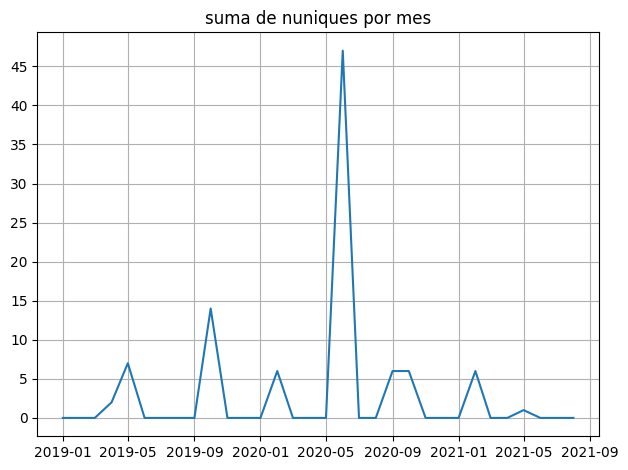

In [34]:
plt.plot(nunique_por_mes.index , (nunique_por_mes==1).sum(axis=1))
plt.yticks(range(0, 50, 5))
plt.grid(True)
plt.title("suma de nuniques por mes")
plt.tight_layout()

In [17]:
media_por_mes = pd.read_csv("../outputs/eda_outputs/outputs_eda_outputs_medias_por_mes.csv",index_col=0)
media_por_mes=media_por_mes.set_index("foto_mes")
media_por_mes=media_por_mes.sort_index()
(media_por_mes==0).sum(axis=1)

foto_mes
201901     0
201902     0
201903     0
201904     2
201905     7
201906     0
201907     0
201908     0
201909     0
201910    14
201911     0
201912     0
202001     0
202002     6
202003     0
202004     0
202005     0
202006    45
202007     0
202008     0
202009     6
202010     6
202011     0
202012     0
202101     0
202102     6
202103     0
202104     0
202105     1
202106     0
202107     0
202108     0
dtype: int64